# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import dependecies
import random
from citipy import citipy
import requests
import json
import time
from datetime import date
import pandas as pd
from pprint import pprint
import scipy.stats as st
import matplotlib.pyplot as plt
from api_keys import weather_api_key

## Generate Cities List

In [2]:
#create a list of cities using random lat and Lon values 

#create list to house city names & countries
citypy_list = []
citypy_country = []

#create loop to generate a random list of city names
for x in range(1500):
    #use citipy and random to find the name of the nearest city at a random Lat and Lon
    #using -55 to 79 deg lat since no cities lie beyond those bounds.
    #this will help prevent clustering of data to cities at extreme Lats
    city = citipy.nearest_city(random.randrange(-55, 79),random.randrange(-180,180))
    #add city name and country to lists
    citypy_list.append(city.city_name)
    citypy_country.append(city.country_code)

#create dataframe of the results
citypy_results = pd.DataFrame({"City":citypy_list, "Country":citypy_country})

#create new DF with duplicate cities removed
cities_df = citypy_results.drop_duplicates(subset="City", keep='first', inplace=False, ignore_index=True)

len(cities_df)

745

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#define base url endpoint
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#define units
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#initialize lists
lats = []
lngs = []
temps = []
hums = []
clouds = []
winds = []
cons = []
dates = []
cities = []
countries = []

#loop through each city in the list and run an api request for it
x = 0
for city in cities_df["City"]:
    #request city data
    response = requests.get(query_url + city).json()
    
    #add relevant data to various lists
    #check for errors when reading response
    try:
        print(f"Processing Record {x} of {len(cities_df)} | {city}")
        x = x + 1
        #append values to lists
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        temps.append(response["main"]["temp_max"])
        hums.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        cons.append(response["sys"]["country"])
        dates.append(response["dt"])
        cities.append(city)
        countries.append(cities_df.loc[cities_df["City"]==city,"Country"].iloc[0])
    #if error, it means the city cannot be found on openweathermap. skip city
    except:
        print(f"City not found. Skipping...")
    
    #wait 1 sec. between requests
    time.sleep(1)

print("done")

#record the date data was collected
date = date.today()
today = date.strftime("%m/%d/%Y")

Processing Record 0 of 745 | saleaula
City not found. Skipping...
Processing Record 1 of 745 | nome
Processing Record 2 of 745 | busselton
Processing Record 3 of 745 | beidao
Processing Record 4 of 745 | saint george
Processing Record 5 of 745 | jamestown
Processing Record 6 of 745 | kavaratti
Processing Record 7 of 745 | severo-kurilsk
Processing Record 8 of 745 | buritama
Processing Record 9 of 745 | hilo
Processing Record 10 of 745 | mataura
Processing Record 11 of 745 | thompson
Processing Record 12 of 745 | butaritari
Processing Record 13 of 745 | marawi
Processing Record 14 of 745 | ribeira grande
Processing Record 15 of 745 | albany
Processing Record 16 of 745 | atuona
Processing Record 17 of 745 | arraial do cabo
Processing Record 18 of 745 | necochea
Processing Record 19 of 745 | paradwip
City not found. Skipping...
Processing Record 20 of 745 | rikitea
Processing Record 21 of 745 | tuatapere
Processing Record 22 of 745 | norman wells
Processing Record 23 of 745 | zhenlai
Proc

Processing Record 195 of 745 | inhambane
Processing Record 196 of 745 | christchurch
Processing Record 197 of 745 | tapiramuta
Processing Record 198 of 745 | avera
Processing Record 199 of 745 | mahebourg
Processing Record 200 of 745 | yarkovo
Processing Record 201 of 745 | kalmunai
Processing Record 202 of 745 | ravar
Processing Record 203 of 745 | helong
Processing Record 204 of 745 | kuching
Processing Record 205 of 745 | mirnyy
Processing Record 206 of 745 | itarema
Processing Record 207 of 745 | juneau
Processing Record 208 of 745 | airai
Processing Record 209 of 745 | gorno-chuyskiy
City not found. Skipping...
Processing Record 210 of 745 | kudahuvadhoo
Processing Record 211 of 745 | kazalinsk
City not found. Skipping...
Processing Record 212 of 745 | samarai
Processing Record 213 of 745 | maceio
Processing Record 214 of 745 | kazachinskoye
Processing Record 215 of 745 | pauri
Processing Record 216 of 745 | ingersoll
Processing Record 217 of 745 | atar
Processing Record 218 of 74

Processing Record 389 of 745 | caibarien
Processing Record 390 of 745 | belaya gora
Processing Record 391 of 745 | bull savanna
Processing Record 392 of 745 | aykhal
Processing Record 393 of 745 | xuddur
Processing Record 394 of 745 | yellowknife
Processing Record 395 of 745 | broken hill
Processing Record 396 of 745 | hasaki
Processing Record 397 of 745 | constitucion
Processing Record 398 of 745 | omsukchan
Processing Record 399 of 745 | samusu
City not found. Skipping...
Processing Record 400 of 745 | cheney
Processing Record 401 of 745 | husavik
Processing Record 402 of 745 | emerald
Processing Record 403 of 745 | kushiro
Processing Record 404 of 745 | marcona
City not found. Skipping...
Processing Record 405 of 745 | illoqqortoormiut
City not found. Skipping...
Processing Record 406 of 745 | arak
Processing Record 407 of 745 | amga
Processing Record 408 of 745 | dutlwe
Processing Record 409 of 745 | gwadar
Processing Record 410 of 745 | sokoni
Processing Record 411 of 745 | te ana

Processing Record 581 of 745 | evensk
Processing Record 582 of 745 | puerto escondido
Processing Record 583 of 745 | kampong chhnang
Processing Record 584 of 745 | taguatinga
Processing Record 585 of 745 | mabaruma
Processing Record 586 of 745 | the valley
Processing Record 587 of 745 | tubruq
City not found. Skipping...
Processing Record 588 of 745 | trelew
Processing Record 589 of 745 | ust-kamchatsk
City not found. Skipping...
Processing Record 590 of 745 | benghazi
Processing Record 591 of 745 | palana
Processing Record 592 of 745 | dok kham tai
Processing Record 593 of 745 | kemijarvi
Processing Record 594 of 745 | san lorenzo
Processing Record 595 of 745 | asuncion
Processing Record 596 of 745 | gremyachye
City not found. Skipping...
Processing Record 597 of 745 | oyotun
Processing Record 598 of 745 | isangel
Processing Record 599 of 745 | ponta delgada
Processing Record 600 of 745 | novikovo
Processing Record 601 of 745 | mahibadhoo
Processing Record 602 of 745 | wakkanai
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create dataframe from the lists of results
rawdata_df = pd.DataFrame({"City":cities,
                           "Country":countries,
                           "Lat":lats,
                           "Lon":lngs,
                           "Max Temp":temps,
                           "Humidity":hums,
                           "Cloudiness":clouds,
                           "Wind Speed":winds,
                           "Date":dates})
#save dataframe to csv file
rawdata_df.to_csv("outputs/Cities Data.csv",index=False)
rawdata_df.head(10)

,City,Country,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,us,64.50,-165.41,48.20,81,90,13.87,1600036035
1,busselton,au,-33.65,115.33,55.99,59,95,5.93,1600035932
2,beidao,cn,34.57,105.89,61.38,84,98,1.72,1600036085
3,saint george,bm,37.10,-113.58,97.00,7,1,11.41,1600036086
4,jamestown,sh,42.10,-79.24,71.01,77,1,11.41,1600036087
5,kavaratti,in,10.57,72.64,81.77,79,100,19.08,1600036088
6,severo-kurilsk,ru,50.68,156.12,50.77,76,3,17.07,1600036089
7,buritama,br,-21.07,-50.15,84.24,20,0,6.33,1600036090
8,hilo,us,19.73,-155.09,82.40,61,75,10.29,1600036092
9,mataura,pf,-46.19,168.86,57.00,84,100,3.00,1600035922


In [6]:
#display stats
rawdata_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,6.810000e+02
mean,20.721968,21.169545,66.671351,71.472834,48.942731,7.465962,1.600037e+09
std,32.339148,88.217360,14.508484,21.191554,38.778458,4.938823,3.826410e+02
min,-54.800000,-179.170000,21.400000,1.000000,0.000000,0.220000,1.600036e+09
25%,-5.180000,-57.430000,55.400000,60.000000,5.000000,3.870000,1.600036e+09
50%,24.140000,25.570000,69.030000,77.000000,48.000000,6.710000,1.600036e+09
75%,48.050000,97.520000,78.440000,88.000000,90.000000,10.000000,1.600037e+09
max,78.220000,179.320000,104.520000,100.000000,100.000000,32.210000,1.600037e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
maxhumid = rawdata_df.index[rawdata_df["Humidity"] > 100].tolist()
maxhumid

[]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = rawdata_df.drop(maxhumid,inplace=False)
clean_city_data.head(10)

,City,Country,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,nome,us,64.50,-165.41,48.20,81,90,13.87,1600036035
1,busselton,au,-33.65,115.33,55.99,59,95,5.93,1600035932
2,beidao,cn,34.57,105.89,61.38,84,98,1.72,1600036085
3,saint george,bm,37.10,-113.58,97.00,7,1,11.41,1600036086
4,jamestown,sh,42.10,-79.24,71.01,77,1,11.41,1600036087
5,kavaratti,in,10.57,72.64,81.77,79,100,19.08,1600036088
6,severo-kurilsk,ru,50.68,156.12,50.77,76,3,17.07,1600036089
7,buritama,br,-21.07,-50.15,84.24,20,0,6.33,1600036090
8,hilo,us,19.73,-155.09,82.40,61,75,10.29,1600036092
9,mataura,pf,-46.19,168.86,57.00,84,100,3.00,1600035922


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

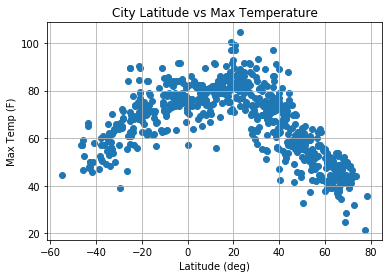

In [23]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"])
plt.title("City Latitude vs Max Temperature")
plt.grid(True)
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (deg)")
plt.savefig("outputs/City Latitude vs Max Temperature.png")
plt.show()

For this plot, the code displays a marker for each city, with latitude as the x-coordinate and max temp as the y-coordinate.
It creates a visual representation showing that cities closer to the equator (0deg) tend to be warmer than those closer to the pole.

## Latitude vs. Humidity Plot

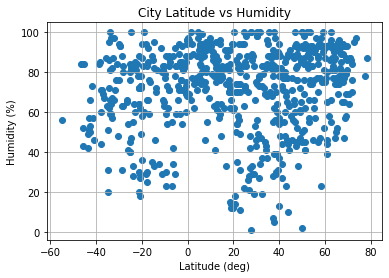

In [24]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"])
plt.title("City Latitude vs Humidity")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")
plt.savefig("outputs/City Latitude vs Humidity.png")
plt.show()

For this plot, the code displays a marker for each city, with latitude as the x-coordinate and humidity as the y-coordinate. It shows that there does not appear to be much correlation between humidity and latidude (at least not an obvious one).

## Latitude vs. Cloudiness Plot

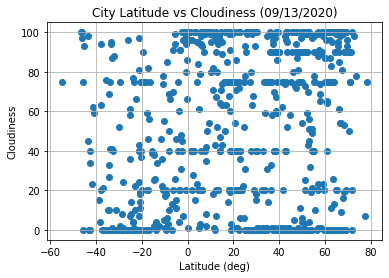

In [26]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"])
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.grid(True)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude (deg)")
plt.savefig("outputs/City Latitude vs Cloudiness.png")
plt.show()

For this plot, the code displays a marker for each city, with latitude as the x-coordinate and cloudiness as the y-coordinate. It shows that there does not appear to be much correlation between cloudiness and latidude (at least not an obvious one). However, it does appear that cloudiness levels tend to be recorded as round numbers (0, 20, 40, 60, 75, 100)

## Latitude vs. Wind Speed Plot

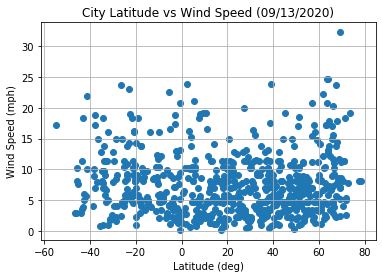

In [27]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"])
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")
plt.savefig("outputs/City Latitude vs Wind Speed.png")
plt.show()

For this plot, the code displays a marker for each city, with latitude as the x-coordinate and wind speed as the y-coordinate. It shows that there does not appear to be much correlation between wind speed and latidude (at least not an obvious one).

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

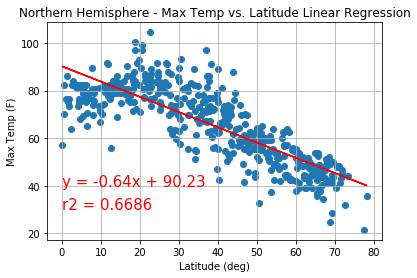

In [28]:
#create dataframe of onyly northern hemisphere data
northern_df = clean_city_data.loc[clean_city_data["Lat"] > 0]

#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Lat"],northern_df["Max Temp"])
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid(True)
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Lat"],northern_df["Max Temp"])
regress_values = northern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Lat"],regress_values, c="r")
plt.annotate(EQ,(0,40),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(0,30),c="r",size=15)
plt.savefig("outputs/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

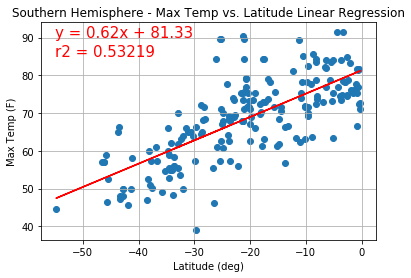

In [29]:
#create dataframe of onyly northern hemisphere data
southern_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

#plot southern hemisphere scatterplot
plt.scatter(southern_df["Lat"],southern_df["Max Temp"])
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.grid(True)
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Lat"],southern_df["Max Temp"])
regress_values = southern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Lat"],regress_values, C="r")
plt.annotate(EQ,(-55,90),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,85),c="r",size=15)
plt.savefig("outputs/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

Max Temp vs Latitude Linear Regression Plots:
These plots show how temperature's dependant relationship is the opposite for the northern and southern hemisperes (positive and negatively, respectively) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

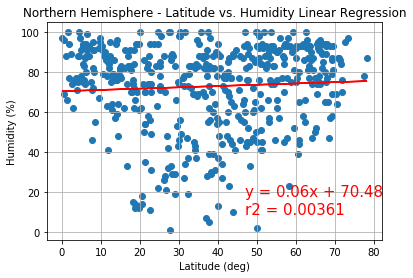

In [30]:
#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Lat"],northern_df["Humidity"])
plt.title(f"Northern Hemisphere - Latitude vs. Humidity Linear Regression")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Lat"],northern_df["Humidity"])
regress_values = northern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Lat"],regress_values, c="r")
plt.annotate(EQ,(47,18),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(47,9),c="r",size=15)
plt.savefig("outputs/Northern Hemisphere - Latitude vs. Humidity Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

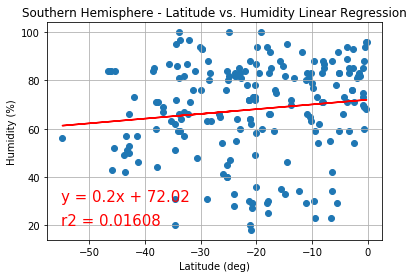

In [32]:
#plot southern hemisphere scatterplot
plt.scatter(southern_df["Lat"],southern_df["Humidity"])
plt.title(f"Southern Hemisphere - Latitude vs. Humidity Linear Regression")
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Lat"],southern_df["Humidity"])
regress_values = southern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Lat"],regress_values, C="r")
plt.annotate(EQ,(-55,30),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,20),c="r",size=15)
plt.savefig("outputs/Southern Hemisphere - Latitude vs. Humidity Linear Regression.png")
plt.show()

Humidity vs Latitude Linear Regression Plots:
These plots show that there does not appear to be any correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

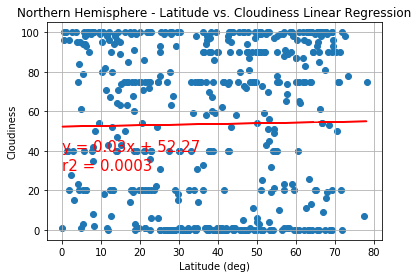

In [34]:
#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Lat"],northern_df["Cloudiness"])
plt.title(f"Northern Hemisphere - Latitude vs. Cloudiness Linear Regression")
plt.grid(True)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Lat"],northern_df["Cloudiness"])
regress_values = northern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Lat"],regress_values, c="r")
plt.annotate(EQ,(0,40),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(0,30),c="r",size=15)
plt.savefig("outputs/Northern Hemisphere - Latitude vs. Cloudiness Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

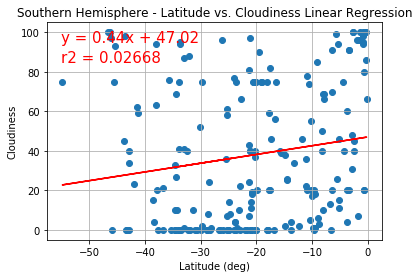

In [35]:
#plot southern hemisphere scatterplot
plt.scatter(southern_df["Lat"],southern_df["Cloudiness"])
plt.title(f"Southern Hemisphere - Latitude vs. Cloudiness Linear Regression")
plt.grid(True)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Lat"],southern_df["Cloudiness"])
regress_values = southern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Lat"],regress_values, C="r")
plt.annotate(EQ,(-55,95),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,85),c="r",size=15)
plt.savefig("outputs/Southern Hemisphere - Latitude vs. Cloudiness Linear Regression.png")
plt.show()

Cloudiness vs Latitude Linear Regression Plots:
These plots show that there does not appear to be any correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

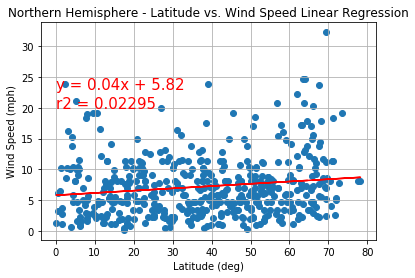

In [36]:
#plot norththern hemisphere scatterplot
plt.scatter(northern_df["Lat"],northern_df["Wind Speed"])
plt.title(f"Northern Hemisphere - Latitude vs. Wind Speed Linear Regression")
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(northern_df["Lat"],northern_df["Wind Speed"])
regress_values = northern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(northern_df["Lat"],regress_values, c="r")
plt.annotate(EQ,(0,23),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(0,20),c="r",size=15)
plt.savefig("outputs/Northern Hemisphere - Latitude vs. Wind Speed Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

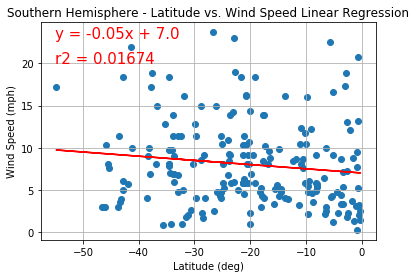

In [39]:
#plot southern hemisphere scatterplot
plt.scatter(southern_df["Lat"],southern_df["Wind Speed"])
plt.title(f"Southern Hemisphere - Latitude vs. Wind Speed Linear Regression")
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")

#calculate regression values
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(southern_df["Lat"],southern_df["Wind Speed"])
regress_values = southern_df["Lat"] * slope + intercept
r2 = rvalue ** 2
EQ = f"y = {round(slope,2)}x + {round(intercept,2)}"

#plot regression line and display equestion and r2 value
plt.plot(southern_df["Lat"],regress_values, C="r")
plt.annotate(EQ,(-55,23),c="r",size=15)
plt.annotate(f"r2 = {round(r2,5)}",(-55,20),c="r",size=15)
plt.savefig("outputs/Southern Hemisphere - Latitude vs. Wind Speed Linear Regression.png")
plt.show()

Wind Speed vs Latitude Linear Regression Plots:
These plots show that there does not appear to be any correlation between latitude and wind speed.